In [1]:
using Pkg, Revise
gen_la_pb_dir = "../GenLinAlgProblems"
Pkg.activate(gen_la_pb_dir)
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, LaTeXStrings, SymPy, Random

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix");

  Activating project at `C:\Users\jeff\NOTEBOOKS\elementary-linear-algebra\GenLinAlgProblems`


<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">The Cholesky Decomposition Test</strong><br>
<strong style="height:45px;color:darkred;font-size:30px;">for Positive (semi)definite Matrices</strong>
</div>

# 1. Sylvester's Law of Inertia

Given a symmetric matrix $A$ and an invertible matrix $S$, consider 
changing the basis<br>$\qquad$ to the columns of $S$ in the quadratic form $Q(x) = x^t A x$,<br>$\qquad$ i.e., set $x = S \tilde{x},$ resulting in
$\tilde{Q}(\tilde{x}) = \tilde{x}^t \left( S^t A S\right) \tilde{x}$.

Since this change of basis does not alter the geometry of the quadratic form, we expect the signs of the eigenvalues of $A$ and $S^t A S$ to remain the same.<br> This is indeed the case and is known as **Sylvester's law of inertia**.


<div style="float:left;background-color:#F2F5A9;color:black;width:100%;">

**Definition:** Two symmetric matrices $A$ and $B$ are **congruent** iff<br>$\qquad$ there exists an invertible matrix $S$ such that $B = S^t A S$.

**Theorem:** Two congruent symmetric matrices with real entries<br>$\qquad$ have **the same numbers of positive, negative, and zero eigenvalues.**<br>$\qquad$ That is, the number of eigenvalues of each sign is an invariant of the associated quadratic form.
</div>

For a proof of the theorem, here is a [link](https://palmer.wellesley.edu/~aschultz/w10/math416/coursenotes_and_handouts/coursenotes_100422.pdf)

**Remark:** Since the only requirement for $S$ is that it is invertible,<br>
$\qquad$ the quadratic forms of $A$ and $S^t A S$ may have axes with different length scales,<br>
$\qquad$ i.e., **while the signs of the eigenvalues stay the same, their magnitudes however are different in general.**

# 2. GE for Symmetric Matrices

Since our matrix is symmetric, we will **use the variation of GE maintaining symmetry**<br>
$\qquad$ that we first encountered when we discussed the [Cholesky Decomposition](CholeskyDecomposition.ipynb).

## 2.1. Case: No Row Exchange Required

We can maintain the symmetry of $A$ by applying an elementary operation $E$ on both sides as follows:<br>
$\qquad \tilde{A} = E A E^t$

**Remarks:**
* since $A$ and $\tilde{A}$ are congruent, Sylvester's law of inertia applies.
* the elimination matrix $E$ introduces zero values below the current pivot.<br>
the multiplication by $E^t$ on the right restores the symmetry:<br> it introduces zero values to the right of the current pivot.

In [2]:
A = [2 4 -2 0; 4 9 3 1; -2 3 52 8; 0 1 8 2]
println("Consider the matrix"); l_show(L"\qquad A=", A)

Consider the matrix


L"$\qquad A= \left(\begin{array}{rrrr}
2 & 4 & -2 & 0 \\
4 & 9 & 3 & 1 \\
-2 & 3 & 52 & 8 \\
0 & 1 & 8 & 2 \\
\end{array}\right)$
"

In the following, we show the explicit computation of Eᵢ Aᵢ Eᵢᵗ


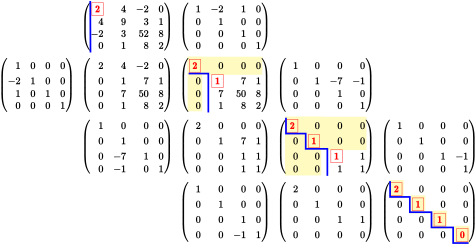

In [3]:
E1=[1 0 0 0; -2 1 0 0; 1  0 1 0; 0  0  0 1]
E2=[1 0 0 0;  0 1 0 0; 0 -7 1 0; 0 -1  0 1]
E3=[1 0 0 0;  0 1 0 0; 0  0 1 0; 0  0 -1 1]
matrices = [
    [:none,      A,         E1',               :none,                  :none],
    [ E1,     E1*A,    E1*A*E1',                 E2',                  :none],
    [ :none,    E2, E2*E1*A*E1',     E2*E1*A*E1'*E2',                    E3'],
    [ :none, :none,         E3 ,  E3*E2*E1*A*E1'*E2', E3*E2*E1*A*E1'*E2'*E3'],
]
h,_=nM.ge( to_latex(matrices), formater=x->x, fig_scale=1,
           pivot_list=[ [(0,1), [(0,0)] ],
                        [(1,2), [(0,0),(1,1)]],
                        [(2,3), [(0,0),(1,1),(2,2)]],
                        [(3,4), [(0,0),(1,1),(2,2),(3,3)]],
                      ],
           ref_path_list = [ [0,1, [(0,0)                  ],"vv","blue,line width=0.6mm"],
                             [1,2, [(0,0),(1,1)            ],"hv","blue,line width=0.6mm"],
                             [2,3, [(0,0),(1,1),(2,2)      ],"vv","blue,line width=0.6mm"],
                             [3,4, [(0,0),(1,1),(2,2),(3,3)],"vh","blue,line width=0.6mm"],
                           ],
           bg_for_entries = [[1,2, [[(0,0), (0,3)], [(0,0),(3,0)]], "yellow!25", 1],
                             [2,3, [[(0,0), (3,1)], [(0,0),(1,3)]], "yellow!25", 1],
                             [3,4, [(0,0), (1,1),(2,2),(3,3)],      "yellow!25", 1],
                            ]
)
println("In the following, we show the explicit computation of Eᵢ Aᵢ Eᵢᵗ")
h

In [4]:
L = I - tril(matrices[2][1]+matrices[3][2]+matrices[4][3],-1)
println( "We have obtained the A = L D Lᵗ decomposition")
@show A == L*matrices[end][end]*L'
l_show(L"\qquad", A, L"=", L, matrices[end][end], L')

We have obtained the A = L D Lᵗ decomposition
A == L * (matrices[end])[end] * L' = true


L"$\qquad \left(\begin{array}{rrrr}
2 & 4 & -2 & 0 \\
4 & 9 & 3 & 1 \\
-2 & 3 & 52 & 8 \\
0 & 1 & 8 & 2 \\
\end{array}\right) = \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
2 & 1 & 0 & 0 \\
-1 & 7 & 1 & 0 \\
0 & 1 & 1 & 1 \\
\end{array}\right) \left(\begin{array}{rrrr}
2 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 2 & -1 & 0 \\
0 & 1 & 7 & 1 \\
0 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

Using Sylvester's Law of inertia, we see that based on the signs of the diagonal entries of $D$,<br>
$\qquad$ **the matrix $\mathbf{A}$ has three positive and one zero eigenvalues.**

$\mathbf{\therefore} \quad A$ **is positive semidefinite**

In [5]:
print("Check the eigenvalues of A:  ", round.(eigvals(A), digits=3)' );

Check the eigenvalues of A:  [0.0 0.719 10.758 53.523]

In [6]:
println("Taking the square root of the diagonal matrix, we obtain the Cholesky Decomposition")
D = matrices[end][end]
R = (L * sqrt.(Matrix{Sym}(D)))'
@show A ≈ R'*R
l_show(L"\qquad R = ", R )

Taking the square root of the diagonal matrix, we obtain the Cholesky Decomposition
trueR' * R = 


L"$\qquad R =  \left(\begin{array}{rrrr}
\sqrt{2} & 2 \cdot \sqrt{2} &  - \sqrt{2} & 0 \\
0 & 1 & 7 & 1 \\
0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 \\
\end{array}\right)$
"

In [7]:
R_reduced = R[1:3,:]
@show A == R_reduced'R_reduced

l_show(L"\qquad A =", R_reduced', R_reduced)

A == R_reduced' * R_reduced = true


L"$\qquad A = \left(\begin{array}{rrr}
\sqrt{2} & 0 & 0 \\
2 \cdot \sqrt{2} & 1 & 0 \\
 - \sqrt{2} & 7 & 1 \\
0 & 1 & 1 \\
\end{array}\right) \left(\begin{array}{rrrr}
\sqrt{2} & 2 \cdot \sqrt{2} &  - \sqrt{2} & 0 \\
0 & 1 & 7 & 1 \\
0 & 0 & 1 & 1 \\
\end{array}\right)$
"

**Remarks:**
* We see that
$\;$ $\mathbf{A}$ **is positive definite if all pivots in GE with no row exchanges and no scaling are positive.**
* We also see that $A$ has a Cholesky Decomposition: $A = R^t R$.<br>
When the matrix $A$ of size $N\times N$ is full rank, the matrix $R$ has size $N\times N$,
otherwise we can use the zero rows/columns of the diagonal matrices to reduce the size of $R$

In the present case, we can use just the first three rows of $R$:

## 2.2 Case: Row Exchanges Required

What if we require a row exchange $P$? Since we are maintaining symmetry, we need to compute $P A P^t$
for a given matrix $A$.

Consider
$\; A = \begin{pmatrix} 0 & a \\ a & b \end{pmatrix}.\;$ The row exchange matrix is $P = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},\;$ and thus
$P A P^t = \begin{pmatrix} b & a \\ a & 0 \end{pmatrix}$

The pivot is the non-zero entry $b$ on the diagonal, not the entry $a$.<br>
$\qquad$ It is easy to check that this holds in general: **we need to choose a pivot on the remaining diagonal,**<br>
<strong style="color:darkred;"> We also need to apply $P$ from the left, and $P^t$ from the right prior to proceeding with the elimination</strong>.<br>
$\mathbf{\therefore}$ **we need to interchange not only the rows, but the columns as well.**

### 2.2.1  Subcase: Require Row Exchange, Pivot Exists

In [8]:
A = [0 2 -2; 2 1 3; -2 3 9]//1
println("Consider the symmetric matrix" )
l_show(L"\qquad A =", A )

Consider the symmetric matrix


L"$\qquad A = \left(\begin{array}{rrr}
0 & 2 & -2 \\
2 & 1 & 3 \\
-2 & 3 & 9 \\
\end{array}\right)$
"

In the following, we show the explicit computation of Eᵢ Aᵢ Eᵢᵗ


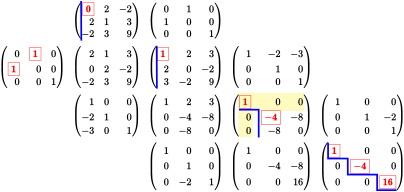

In [9]:
E1 = [0 1 0;  1 0 0;  0 0 1]//1
E2 = [1 0 0; -2 1 0; -3 0 1]//1
E3 = [1 0 0;  0 1 0;  0 -2 1]//1

matrices = [
    [:none,      A,         E1',               :none,                  :none],
    [ E1,     E1*A,    E1*A*E1',                 E2',                  :none],
    [ :none,    E2, E2*E1*A*E1',     E2*E1*A*E1'*E2',                    E3'],
    [ :none, :none,         E3 ,  E3*E2*E1*A*E1'*E2', E3*E2*E1*A*E1'*E2'*E3'],
]
h,_=nM.ge( to_latex(matrices), formater=x->x, fig_scale=1,
           pivot_list=[ [(0,1), [(0,0)] ],
                        [(1,2), [(0,0)]],
                        [(2,3), [(0,0),(1,1)]],
                        [(3,4), [(0,0),(1,1),(2,2)]],
                        [(1,0), [(0,1), (1,0)]],
                      ],
           ref_path_list = [ [0,1, [(0,0)                  ],"vv","blue,line width=0.6mm"],
                             [1,2, [(0,0)                  ],"vv","blue,line width=0.6mm"],
                             [2,3, [(0,0),(1,1)            ],"hv","blue,line width=0.6mm"],
                             [3,4, [(0,0),(1,1),(2,2)      ],"vh","blue,line width=0.6mm"],
                           ],
           bg_for_entries = [[2,3, [[(0,0), (0,2)], [(0,0),(2,0)]], "yellow!25", 1],
                             #[3,4, [[(0,0), (2,1)], [(0,0),(1,2)]], "yellow!25", 1],
                             #[3,4, [(0,0), (1,1),(2,2),(3,3)],      "yellow!25", 1],
                            ]
)
println("In the following, we show the explicit computation of Eᵢ Aᵢ Eᵢᵗ")
h

We had to do a row exchange, but were able ro reduce $A$ to a diagonal.<br>We have obtained
a $A = P L D U\ $ decomposition, where $\ U = L^t P^t$.

In [10]:
P = E1
D = matrices[end][end]
L = P'* inv(P'*E3*E2*P) * P

@show A == P*L*D*L'*P';
l_show( L"\qquad P=", P, L"\quad L=", L, L"\quad D=", D)

A == P * L * D * L' * P' = true


L"$\qquad P= \left(\begin{array}{rrr}
0 & 1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1 \\
\end{array}\right) \quad L= \left(\begin{array}{rrr}
1 & 0 & 0 \\
2 & 1 & 0 \\
3 & 2 & 1 \\
\end{array}\right) \quad D= \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & -4 & 0 \\
0 & 0 & 16 \\
\end{array}\right)$
"

Therefore $A$ has two positive and one negative eigenvalues: $A$ is **indefinite**.

In [11]:
print("Check the eigenvalues of A:  ", round.(eigvals(A), digits=2)' );

Check the eigenvalues of A:  [-2.59 2.43 10.17]

**Remark:** We can define $R = P L D^\frac{1}{2}$, but the square root of $D$ has an imaginary term.<br>
$\qquad$ We obtain a $A = R R^t\ $ factorization where $R$ is a complex matrix.

## 2.3 Case: Row Exchange Required, Missing Pivots 

We are not guaranteed to find a pivot. Consider the following example:

In [12]:
A = [3 -9 -9 3; -9 29 23 -11; -9 23 35 -3; 3 -11 -3 5]
l_show(L"\qquad A=", A)

L"$\qquad A= \left(\begin{array}{rrrr}
3 & -9 & -9 & 3 \\
-9 & 29 & 23 & -11 \\
-9 & 23 & 35 & -3 \\
3 & -11 & -3 & 5 \\
\end{array}\right)$
"

In the following, we show the explicit computation of Eᵢ Aᵢ Eᵢᵗ


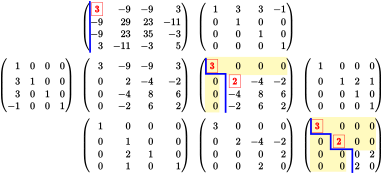

In [13]:
E1 = [1 0 0 0; 3 1 0 0; 3 0 1 0; -1 0 0 1]//1
E2 = [1 0 0 0; 0 1 0 0; 0 2 1 0;  0 1 0 1]//1
matrices = [
    [:none,      A,         E1',               :none],
    [ E1,     E1*A,    E1*A*E1',                 E2'],
    [ :none,    E2, E2*E1*A*E1',     E2*E1*A*E1'*E2'],
]
h,_=nM.ge( to_latex(matrices), formater=x->x, fig_scale=1,
           pivot_list=[ [(0,1), [(0,0)] ],
                        [(1,2), [(0,0),(1,1)]],
                        [(2,3), [(0,0),(1,1)]],
                      ],
           ref_path_list = [ [0,1, [(0,0)                  ],"vv","blue,line width=0.6mm"],
                             [1,2, [(0,0) , (1,1)          ],"vv","blue,line width=0.6mm"],
                             [2,3, [(0,0),(1,1), (2,2)     ],"vv","blue,line width=0.6mm"],
                           ],
           bg_for_entries = [[1,2, [[(0,0), (0,3)], [(0,0),(3,0)]], "yellow!25", 1],
                             [2,3, [[(0,0), (3,1)], [(0,0),(1,3)]], "yellow!25", 1],
                            ]
)
println("In the following, we show the explicit computation of Eᵢ Aᵢ Eᵢᵗ")
h

We have obtained a congruent matrix $\left(
\begin{array}{cc|cc}
\color{red}3 & 0 & 0 & 0 \\
0 & \color{red}2 & 0 & 0 \\ \hline
0 & 0 & 0 & \color{red}2 \\
0 & 0 & \color{red}2 & 0 \\
\end{array}
\right)\;$ for $A$,<br>
$\qquad$ but the submatrix $T = \begin{pmatrix}0&2 \\ 2 & 0 \end{pmatrix}$ has no pivot and cannot be further reduced to a symmetric matrix.

Note that the eigenvalues of this matrix are $3,2$, and the eigenvalues of $T$.

<div style="float:left;background-color:#F2F5A9;color:black;width:100%;">

**Theorem:** A real symmetric matrix $T$ with zeros on the diagonal other than the zero matrix is indefinite.
</div>

This is easy to see:
* A symmetric matrix has an orthonormal decomposition $Q \Lambda Q^t$, and is therefore congruent to $\Lambda$.
* This matrix is the zero matrix iff all eigenvalues are zero. Otherwise the matrix has one or more non-zero eigenvalues.
* Since trace$(T) = 0$, the eigenvalues must sum to zero. $T$ therefore must have both positive and negative eigenvalues.

___
The matrix $A$ considered above is therefore **indefinite:** it has 3 positive and one negative eigenvalues.

In [14]:
print("Check the eigenvalues of A:  ", round.(eigvals(A), digits=2)' );

Check the eigenvalues of A:  [-0.83 0.04 12.83 59.96]

# 3. Take Away

Given a symmetric matrix $A$, Gaussian elimination results in $A = E \tilde{A} E^t$,<br> where $A$ and $\tilde{A}$ are congruent and therefore have the same signature.

$\qquad$ In general, $\tilde{A} = \begin{pmatrix} \color{red}D & 0 & 0 \\ 0 & \color{red}T & 0 \\ 0 & 0 & \color{red}0 \end{pmatrix}$, with three possible square diagonal blocks<br>$\qquad$  (any one or two of which may not be present):<br>
    $\qquad$ &#8226; the matrix block $D$ is diagonal with non-zero diagonal entries<br>
    $\qquad$ &#8226; the matrix block $T$ is symmetric with zeros on the diagonal<br>
    $\qquad$ &#8226; the matrix block $0$ is a zero matrix

We see that the Cholesky decomposition fails<br>
$\qquad$ whenever there is a matrix $T$ and/or
whenever $D$ has negative entries.<br>$\qquad$  In these cases, the matrix $A$ **is not positive (semi) definite.**

If the Cholesky decomposition succeeds, $A =  R^t R,\;\;$ where $R = \begin{pmatrix} D^\frac{1}{2} & 0 \\ 0 & 0 \end{pmatrix} E^t\;$ is a real matrix<br>
    $\qquad$ if there is a zero block, we can further reduce $R$ by removing the zero rows and columns:<br>
    $\qquad$ In this case, the matrix $R$ is no longer square, and $A$ is **positive semi-definite**.<br>
    $\qquad$ otherwise, the matrix $R$ is square and $A$ is **positive definite**.